In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Read data


In [46]:
df = pd.read_csv('C:/Users/varap/OneDrive/Desktop/coderscave/Diabbetes prediction/archive/diabetes.csv')

view data


In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


check the null values in data set

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

get imformation about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Visualizing it for featuring

<AxesSubplot:xlabel='Outcome', ylabel='count'>

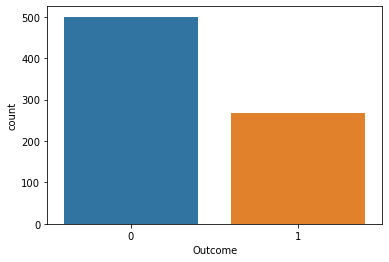

In [9]:
sns.countplot(x=df['Outcome'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

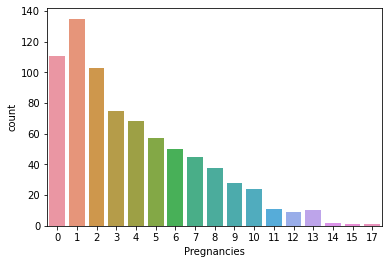

In [10]:
sns.countplot(x=df['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

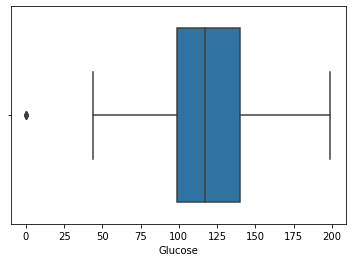

In [13]:
sns.boxplot(x=df['Glucose'])

Remove outliners

In [15]:
df.drop(df[df['Glucose'] < 25].index, inplace=True)

<AxesSubplot:xlabel='BloodPressure'>

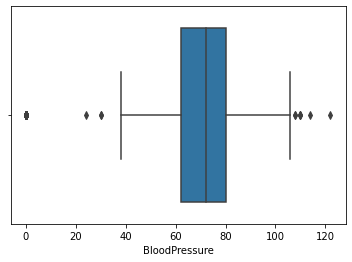

In [16]:
sns.boxplot(x=df['BloodPressure'])

remove outliners for above

In [17]:
df.drop(df[df['BloodPressure'] < 30].index, inplace=True)

<AxesSubplot:xlabel='SkinThickness'>

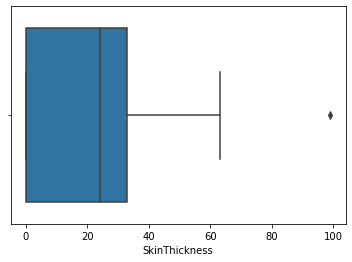

In [20]:
sns.boxplot(x=df['SkinThickness'])

remove outliners for above

In [21]:
df.drop(df[df['SkinThickness'] > 80].index, inplace=True)

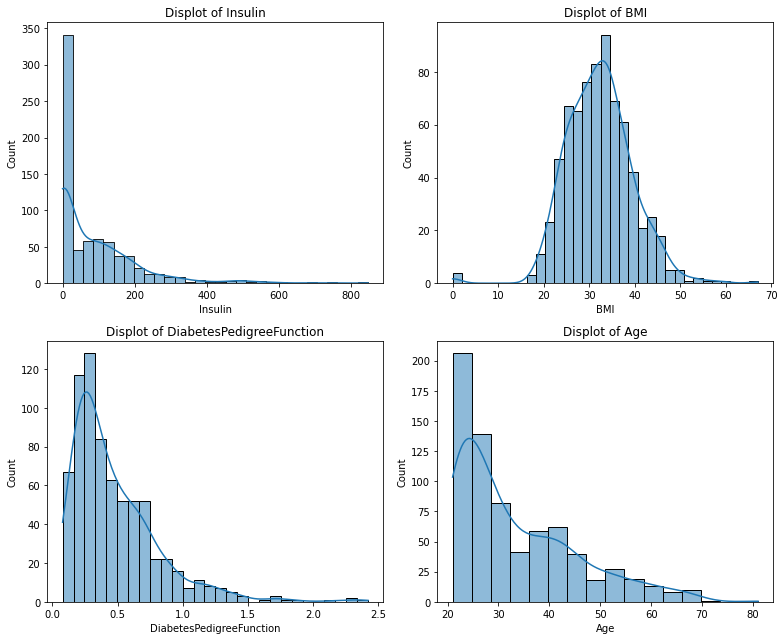

In [22]:
dis_cols = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize = (11,9))

for i in range(len(dis_cols)):
    plt.subplot(2, 2, i + 1)  # 2 Rows , 2 cols 
    sns.histplot(x = df[dis_cols[i]],kde=True)
    plt.title('Displot of {}'.format(dis_cols[i]))
    plt.tight_layout()

correlation among them

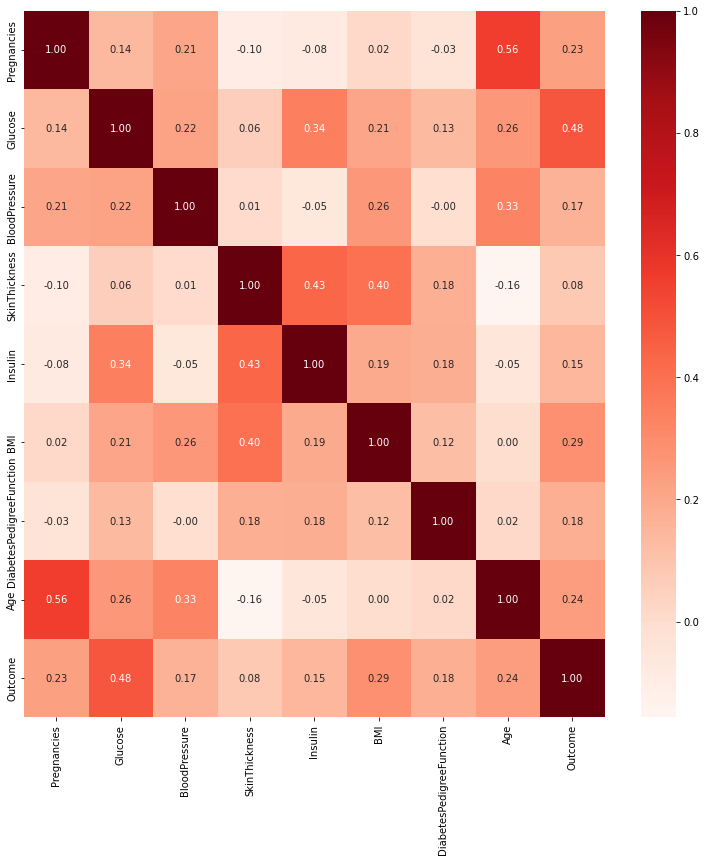

In [23]:
plt.figure(figsize=(13,13))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

Now Balancing this

In [24]:
df_majority_0 = df[(df['Outcome']==0)] 
df_minority_1 = df[(df['Outcome']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 477, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

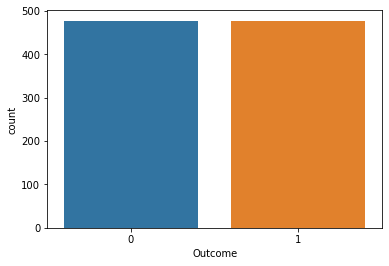

In [25]:
sns.countplot(x=df_upsampled['Outcome'])

Now we are going to split this data set for Modling

In [26]:
X = df_upsampled.drop(columns='Outcome')
y = df_upsampled['Outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=100)

Machine Learning modesls

gradient boosting classifier

In [29]:
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.3, random_state=0)
GBCModel.fit(X_train, y_train)
print('Train score is : ' , GBCModel.score(X_train, y_train))
print('Test score is : ' , GBCModel.score(X_test, y_test))

Train score is :  1.0
Test score is :  0.9214659685863874


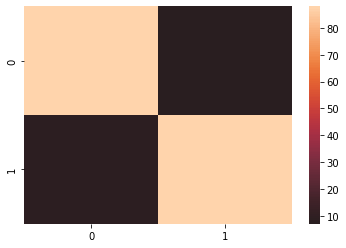

Confusion Matrix is
 [[88  7]
 [ 8 88]]


In [30]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [31]:
print(classification_report(y_test, y_pred_GB))
print(accuracy_score(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.93      0.92      0.92        96

    accuracy                           0.92       191
   macro avg       0.92      0.92      0.92       191
weighted avg       0.92      0.92      0.92       191

0.9214659685863874


Random forest classifier

In [33]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=9,random_state=44) 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('Train score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('Test score is : ' , RandomForestClassifierModel.score(X_test, y_test))

Train score is :  0.9855832241153342
Test score is :  0.9057591623036649


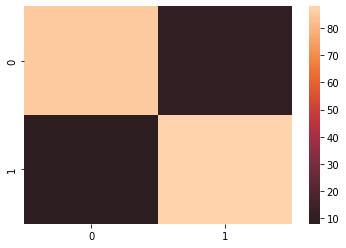

Confusion Matrix is
 [[85 10]
 [ 8 88]]


In [34]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [35]:
print(classification_report(y_test, y_pred_RF))
print(accuracy_score(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        95
           1       0.90      0.92      0.91        96

    accuracy                           0.91       191
   macro avg       0.91      0.91      0.91       191
weighted avg       0.91      0.91      0.91       191

0.9057591623036649


Voting classifier

In [41]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('RFModel',RandomForestClassifierModel)],
                            voting='soft')
VotingClassifierModel.fit(X_train, y_train)

print('Train score is : ' , VotingClassifierModel.score(X_train, y_train))
print('Test score is : ' , VotingClassifierModel.score(X_test, y_test))

Train score is :  1.0
Test score is :  0.9162303664921466


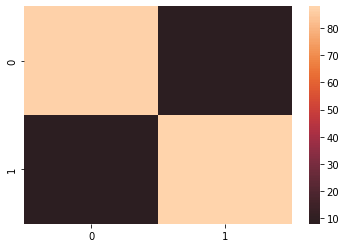

Confusion Matrix is
 [[87  8]
 [ 8 88]]


In [42]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)

sns.heatmap(CM_V, center=True)
plt.show()

print('Confusion Matrix is\n', CM_V)

In [43]:
print(classification_report(y_test, y_pred_V))
print(accuracy_score(y_test, y_pred_V))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.92      0.92      0.92        96

    accuracy                           0.92       191
   macro avg       0.92      0.92      0.92       191
weighted avg       0.92      0.92      0.92       191

0.9162303664921466
